In [1]:
import pandas as pd
from pandas import Series
from pandas import DataFrame

In [2]:
df=pd.read_excel('https://github.com/springcoil/marsmodelling/blob/master/relay-foods.xlsx?raw=true', 
                 sheet_name='Purchase Data - Full Study')
df.head()

C:\Users\unhoc\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderId       2891 non-null   int64         
 1   OrderDate     2891 non-null   datetime64[ns]
 2   UserId        2891 non-null   int64         
 3   TotalCharges  2891 non-null   float64       
 4   CommonId      2891 non-null   object        
 5   PupId         2891 non-null   int64         
 6   PickupDate    2891 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 158.2+ KB


In [4]:
df.drop(['CommonId','PupId','PickupDate','TotalCharges'],
        axis=1,inplace=True)
df.head()

,OrderId,OrderDate,UserId
0,262,2009-01-11,47
1,278,2009-01-20,47
2,294,2009-02-03,47
3,301,2009-02-06,47
4,302,2009-02-06,47


In [5]:
df['OrderDate'].head()

0   2009-01-11
1   2009-01-20
2   2009-02-03
3   2009-02-06
4   2009-02-06
Name: OrderDate, dtype: datetime64[ns]

In [6]:
df['OrderDate'].dtype

dtype('<M8[ns]')

In [7]:
df['OrderPeriod']=df['OrderDate'].dt.strftime('%Y-%m')
df.head()

,OrderId,OrderDate,UserId,OrderPeriod
0,262,2009-01-11,47,2009-01
1,278,2009-01-20,47,2009-01
2,294,2009-02-03,47,2009-02
3,301,2009-02-06,47,2009-02
4,302,2009-02-06,47,2009-02


In [8]:
df.set_index('UserId',inplace=True)
df.head()

,OrderId,OrderDate,OrderPeriod
UserId,,,
47,262,2009-01-11,2009-01
47,278,2009-01-20,2009-01
47,294,2009-02-03,2009-02
47,301,2009-02-06,2009-02
47,302,2009-02-06,2009-02


In [9]:
FirstOrder=df.groupby(df.index)['OrderDate'].min()
FirstOrder.head()

UserId
47    2009-01-11
95    2009-03-10
98    2009-01-29
112   2009-01-19
141   2009-11-13
Name: OrderDate, dtype: datetime64[ns]

In [10]:
FirstOrder=FirstOrder.dt.strftime('%Y-%m')
FirstOrder.head()

UserId
47     2009-01
95     2009-03
98     2009-01
112    2009-01
141    2009-11
Name: OrderDate, dtype: object

In [11]:
df['FirstOrder']=FirstOrder
df.reset_index(inplace=True)
df.head()

,UserId,OrderId,OrderDate,OrderPeriod,FirstOrder
0,47,262,2009-01-11,2009-01,2009-01
1,47,278,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,2009-02,2009-01
3,47,301,2009-02-06,2009-02,2009-01
4,47,302,2009-02-06,2009-02,2009-01


In [12]:
grouped = df.groupby(['FirstOrder', 'OrderPeriod'])

In [13]:
cohorts=grouped['UserId'].nunique()
cohorts.head()

FirstOrder  OrderPeriod
2009-01     2009-01        22
            2009-02         8
            2009-03        10
            2009-04         9
            2009-05        10
Name: UserId, dtype: int64

In [14]:
cohorts=cohorts.reset_index()
cohorts.head()

,FirstOrder,OrderPeriod,UserId
0,2009-01,2009-01,22
1,2009-01,2009-02,8
2,2009-01,2009-03,10
3,2009-01,2009-04,9
4,2009-01,2009-05,10


In [15]:
cohorts.rename({'UserId':'TotalUsers'},axis=1,inplace=True)
cohorts.head()

,FirstOrder,OrderPeriod,TotalUsers
0,2009-01,2009-01,22
1,2009-01,2009-02,8
2,2009-01,2009-03,10
3,2009-01,2009-04,9
4,2009-01,2009-05,10


In [16]:
each_period=cohorts['FirstOrder'].value_counts().sort_index()
each_period

2009-01    15
2009-02    13
2009-03    13
2009-04    12
2009-05    11
2009-06    10
2009-07     9
2009-08     8
2009-09     7
2009-10     6
2009-11     5
2009-12     4
2010-01     3
2010-02     2
2010-03     1
Name: FirstOrder, dtype: int64

In [17]:
cohorts[cohorts['FirstOrder']=='2009-02']

,FirstOrder,OrderPeriod,TotalUsers
15,2009-02,2009-02,15
16,2009-02,2009-03,3
17,2009-02,2009-04,5
18,2009-02,2009-05,1
19,2009-02,2009-06,4
20,2009-02,2009-07,4
21,2009-02,2009-08,4
22,2009-02,2009-09,5
23,2009-02,2009-10,5
24,2009-02,2009-11,4


In [19]:
cohorts.loc[cohorts.shape[0],'FirstOrder']='2009-02'
cohorts.loc[cohorts.shape[0]-1,'OrderPeriod']='2010-03'
cohorts.loc[cohorts.shape[0]-1,'TotalUsers']=0
cohorts.sort_values(['FirstOrder','OrderPeriod'],inplace=True)

In [20]:
cohorts[cohorts['FirstOrder']=='2009-02']

,FirstOrder,OrderPeriod,TotalUsers
15,2009-02,2009-02,15.0
16,2009-02,2009-03,3.0
17,2009-02,2009-04,5.0
18,2009-02,2009-05,1.0
19,2009-02,2009-06,4.0
20,2009-02,2009-07,4.0
21,2009-02,2009-08,4.0
22,2009-02,2009-09,5.0
23,2009-02,2009-10,5.0
24,2009-02,2009-11,4.0


In [21]:
each_period=cohorts['FirstOrder'].value_counts().sort_index()
each_period

2009-01    15
2009-02    15
2009-03    13
2009-04    12
2009-05    11
2009-06    10
2009-07     9
2009-08     8
2009-09     7
2009-10     6
2009-11     5
2009-12     4
2010-01     3
2010-02     2
2010-03     1
Name: FirstOrder, dtype: int64

In [22]:
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

In [23]:
cohorts['CohortPeriod']=cohortperiod
cohorts.head(20)

,FirstOrder,OrderPeriod,TotalUsers,CohortPeriod
0,2009-01,2009-01,22.0,0
1,2009-01,2009-02,8.0,1
2,2009-01,2009-03,10.0,2
3,2009-01,2009-04,9.0,3
4,2009-01,2009-05,10.0,4
5,2009-01,2009-06,8.0,5
6,2009-01,2009-07,8.0,6
7,2009-01,2009-08,7.0,7
8,2009-01,2009-09,7.0,8
9,2009-01,2009-10,7.0,9


In [24]:
cohorts.set_index(['FirstOrder','CohortPeriod'],inplace=True)
cohorts.head()

OrderPeriod  TotalUsers
FirstOrder CohortPeriod                        
2009-01    0                2009-01        22.0
           1                2009-02         8.0
           2                2009-03        10.0
           3                2009-04         9.0
           4                2009-05        10.0

In [25]:
cohorts=cohorts['TotalUsers'].unstack(1)
cohorts

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
FirstOrder,,,,,,,,,,,,,,,
2009-01,22.0,8.0,10.0,9.0,10.0,8.0,8.0,7.0,7.0,7.0,7.0,8.0,11.0,7.0,6.0
2009-02,15.0,3.0,5.0,1.0,4.0,4.0,4.0,5.0,5.0,4.0,3.0,3.0,5.0,0.0,0.0
2009-03,13.0,4.0,5.0,4.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,1.0,NaN,NaN
2009-04,39.0,13.0,10.0,13.0,6.0,7.0,4.0,6.0,2.0,4.0,3.0,2.0,NaN,NaN,NaN
2009-05,50.0,13.0,12.0,5.0,4.0,6.0,3.0,5.0,5.0,4.0,3.0,NaN,NaN,NaN,NaN
2009-06,32.0,15.0,9.0,6.0,7.0,5.0,3.0,3.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
2009-07,50.0,23.0,13.0,10.0,11.0,10.0,11.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2009-08,31.0,11.0,9.0,7.0,6.0,8.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09,37.0,15.0,14.0,8.0,13.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
cohorts[0]

FirstOrder
2009-01     22.0
2009-02     15.0
2009-03     13.0
2009-04     39.0
2009-05     50.0
2009-06     32.0
2009-07     50.0
2009-08     31.0
2009-09     37.0
2009-10     54.0
2009-11    130.0
2009-12     65.0
2010-01     95.0
2010-02    100.0
2010-03     24.0
Name: 0, dtype: float64

In [28]:
user_retention=cohorts.divide(cohorts[0],axis=0)
user_retention

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
FirstOrder,,,,,,,,,,,,,,,
2009-01,1.0,0.363636,0.454545,0.409091,0.454545,0.363636,0.363636,0.318182,0.318182,0.318182,0.318182,0.363636,0.500000,0.318182,0.272727
2009-02,1.0,0.200000,0.333333,0.066667,0.266667,0.266667,0.266667,0.333333,0.333333,0.266667,0.200000,0.200000,0.333333,0.000000,0.000000
2009-03,1.0,0.307692,0.384615,0.307692,0.076923,0.153846,0.153846,0.230769,0.153846,0.076923,0.230769,0.153846,0.076923,NaN,NaN
2009-04,1.0,0.333333,0.256410,0.333333,0.153846,0.179487,0.102564,0.153846,0.051282,0.102564,0.076923,0.051282,NaN,NaN,NaN
2009-05,1.0,0.260000,0.240000,0.100000,0.080000,0.120000,0.060000,0.100000,0.100000,0.080000,0.060000,NaN,NaN,NaN,NaN
2009-06,1.0,0.468750,0.281250,0.187500,0.218750,0.156250,0.093750,0.093750,0.312500,0.093750,NaN,NaN,NaN,NaN,NaN
2009-07,1.0,0.460000,0.260000,0.200000,0.220000,0.200000,0.220000,0.140000,0.140000,NaN,NaN,NaN,NaN,NaN,NaN
2009-08,1.0,0.354839,0.290323,0.225806,0.193548,0.258065,0.129032,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09,1.0,0.405405,0.378378,0.216216,0.351351,0.243243,0.216216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


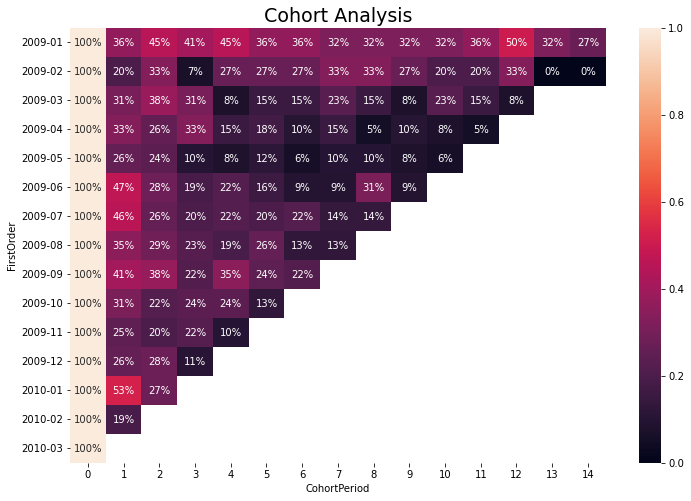

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()

# 판다스 군집분석

In [30]:
import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 

# 필요한 패키지 설치
import pandas as pd
import numpy as np

# iris 데이터 불러오기 위한 datasets 설치
from sklearn import datasets

In [31]:
# skearn.datasets에 포함된 iris(붓꽃) 데이터 가져오기
iris = datasets.load_iris() 

# iris 데이터 내 data값들
data= pd.DataFrame(iris.data) ; data

# iris데이터의 feature 이름
feature= pd.DataFrame(iris.feature_names) ; feature

# data의 컬럼명을 feature이름으로 수정하기
data.columns = feature[0]

# 세가지 붓꽃의 종류
target=pd.DataFrame(iris.target) ; target

# 컬럼명 바꾸기
target.columns=['target']

# data와 target 데이터프레임을 합치기 (axis=1, columns으로 합치기)
df= pd.concat([data,target], axis=1)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [33]:
#target 컬럼을 object 타입으로 변경
df = df.astype({'target': 'object'})

In [34]:
# 결측치 없음, 각 속성마다 150개 row씩 있음
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
# 클러스터 돌리기 전 변수를 생성
df_f = df.copy()

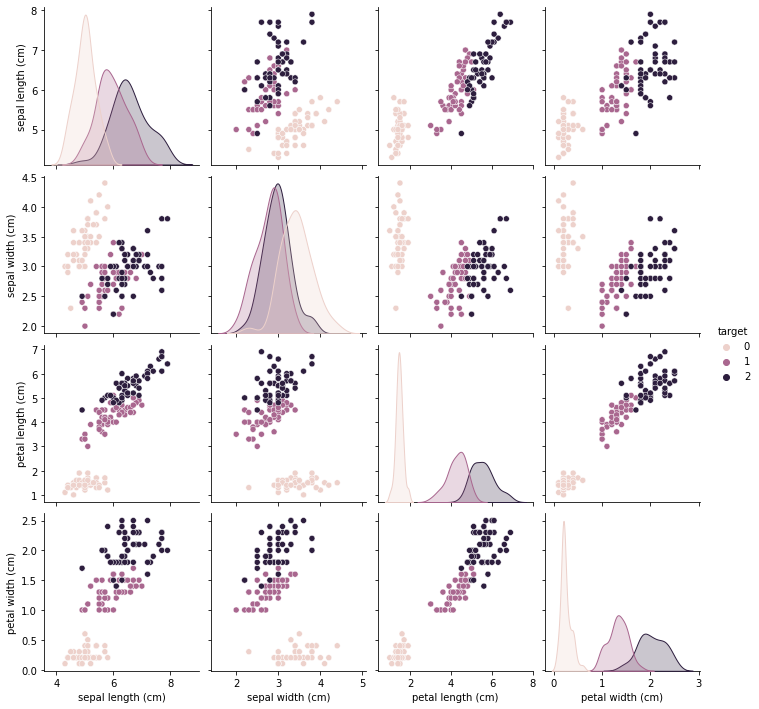

In [36]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(df_f, hue="target")
plt.show()

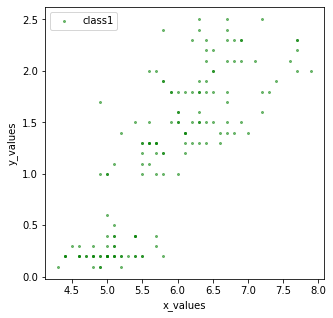

In [37]:
# 2차원 그리기

fig = plt.figure(figsize=(5,5))
X = df_f

plt.plot(  X.iloc[:,0]
         , X.iloc[:,3]
         , 'o'
         , markersize=2
         , color='green'
         , alpha=0.5
         , label='class1'
        )

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.legend() #범례표시
plt.show()

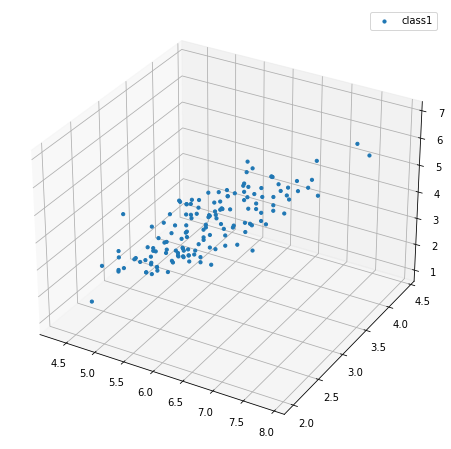

In [38]:
# 3차원 그리기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = df_f

# 3d scatterplot 그리기
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
#           , c=X.index #마커컬러
           , s=10 #사이즈
           , cmap="orange" #컬러맵
           , alpha=1 #투명도
           , label='class1' #범례
          )

plt.legend() #범례표시
plt.show()

In [40]:
df_f.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\unhoc\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


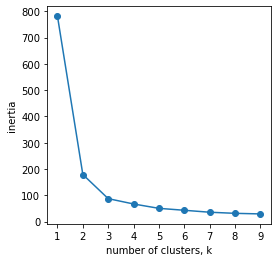

In [39]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_f)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [41]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df_f) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df_f) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

          0         1         2         3         4
0  5.915686  2.764706  4.264706  1.333333  1.019608
1  5.006000  3.428000  1.462000  0.246000  0.000000
2  6.622449  2.983673  5.573469  2.032653  2.000000
[1 1 1 1 1 1 1 1 1 1]


In [42]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = df_f.copy()
clust_df['clust'] = pred
clust_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clust
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


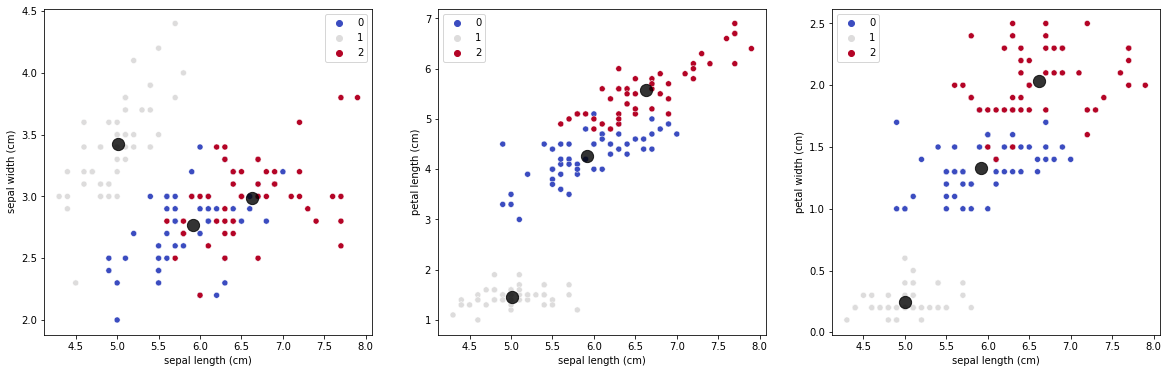

In [43]:
# scaling하지 않은 데이터를 학습하고 시각화하기

plt.figure(figsize=(20, 6))

X = clust_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=df_f, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=df_f, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=df_f, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)

plt.show()

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(df_f.iloc[:,0:4]), columns=df_f.iloc[:,0:4].columns) # scaled된 데이터

In [45]:
# create model and prediction
# clust_model은 스케일링 전 fit과 동일하게 맞춤

clust_model.fit(scaled_df) # unsupervised learning #애초에 결과를 모르기 때문에 data만 넣어주면 됨

centers_s = clust_model.cluster_centers_
pred_s = clust_model.predict(scaled_df)

In [46]:
# 스케일링 전에 합쳐준 데이터프레임에 스케일한 군집 컬럼 추가하기
clust_df['clust_s'] = pred_s
clust_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clust,clust_s
0,5.1,3.5,1.4,0.2,0,1,0
1,4.9,3.0,1.4,0.2,0,1,0
2,4.7,3.2,1.3,0.2,0,1,0
3,4.6,3.1,1.5,0.2,0,1,0
4,5.0,3.6,1.4,0.2,0,1,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,2
146,6.3,2.5,5.0,1.9,2,2,1
147,6.5,3.0,5.2,2.0,2,2,2
148,6.2,3.4,5.4,2.3,2,2,2


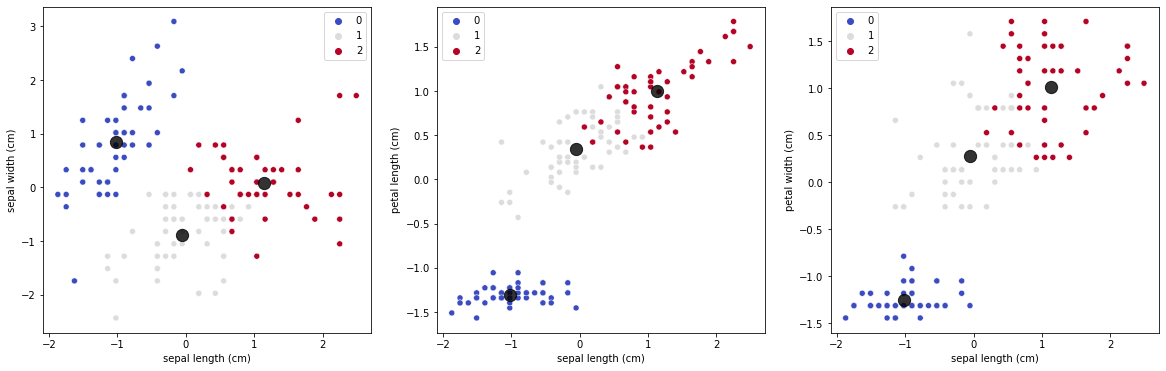

In [47]:
# scaling 완료한 데이터를 학습하고 시각화하기

plt.figure(figsize=(20, 6))

X = scaled_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,3], c='black', alpha=0.8, s=150)

plt.show()

In [48]:
# 스케일링 전 데이터의 군집
pd.crosstab(clust_df['target'],clust_df['clust'])

# 스케일링 후 데이터의 군집
pd.crosstab(clust_df['target'],clust_df['clust_s'])

clust_s,0,1,2
target,,,
0,50,0,0
1,0,39,11
2,0,14,36
